In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

## 讀入資料庫

In [3]:
from tensorflow.keras.datasets import fashion_mnist

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
len(x_train)

60000

In [7]:
len(x_test)

10000

## 資料處理

In [8]:
x_train = x_train.reshape(60000, 28, 28, 1)/255

In [9]:
x_test = x_test.reshape(10000, 28, 28, 1)/255

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### 讀入必要函式

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

## 1.打造神經網路

In [13]:
model = Sequential()    ## 開函數學習機

In [14]:
model.add (Conv2D(32, (3,3), padding='same',              ## Conv2D後面的是filter層的層數 通常是2的次方,其後通常會倍增
                 input_shape=(28,28,1),                   ## (3,3)是filter的大小  filter他自己會學來
                 activation='relu'))

In [15]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [16]:
model.add(Conv2D(64, (3,3), padding='same',
                activation = 'relu'))

In [17]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [18]:
model.add(Conv2D(128, (3,3), padding='same',
                activation = 'relu'))

In [19]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [20]:
model.add(Flatten())

In [21]:
model.add(Dense(80, activation='relu'))     ## 神經元數目數量隨便決定

In [22]:
model.add(Dense(10, activation='softmax'))  ## 輸入和輸出不能改

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

### loss function選不一樣 速度會不一樣準確率也會不一樣  這次選用了MAE

In [24]:
model.compile(loss='mae', optimizer=SGD(lr=0.095),             
             metrics = ['accuracy'])

## 2. FIT

In [25]:
model.fit(x_train, y_train, batch_size = 100, epochs = 15)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 99s 2ms/sample - loss: 0.1791 - accuracy: 0.1711
Epoch 2/15
60000/60000 [==============================] - 100s 2ms/sample - loss: 0.1474 - accuracy: 0.4006
Epoch 3/15
60000/60000 [==============================] - 101s 2ms/sample - loss: 0.0877 - accuracy: 0.5770
Epoch 4/15
60000/60000 [==============================] - 103s 2ms/sample - loss: 0.0844 - accuracy: 0.5839
Epoch 5/15
60000/60000 [==============================] - 103s 2ms/sample - loss: 0.0831 - accuracy: 0.58992s - loss:
Epoch 6/15
60000/60000 [==============================] - 102s 2ms/sample - loss: 0.0824 - accuracy: 0.5923
Epoch 7/15
60000/60000 [==============================] - 103s 2ms/sample - loss: 0.0817 - accuracy: 0.5947 - loss: 0.0818  - ETA: 0s - loss: 0.0817 - accuracy: 0.
Epoch 8/15
60000/60000 [==============================] - 103s 2ms/sample - loss: 0.0812 - accuracy: 0.5968
Epoch 9/15
60000/60000 [========================

## 3.預測

In [26]:
result = model.predict_classes(x_test)

In [31]:
def my_predict(n):
    print("我可愛的CNN預測是", class_names[result[n]])
    X = x_test[n].reshape(28, 28)
    plt.imshow(X, cmap='Greys')

我可愛的CNN預測是 Shirt


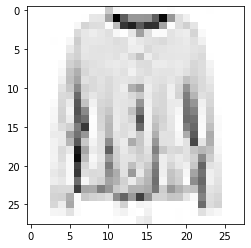

In [32]:
my_predict(25)

In [33]:
from ipywidgets import interact_manual

In [34]:
interact_manual(my_predict, n =(0,9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.my_predict(n)>

In [35]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 7s 733us/sample - loss: 0.0803 - accuracy: 0.6014


In [36]:
loss, acc = score

In [40]:
print("測試資料正確率", round((acc*100),3) ,"%")

測試資料正確率 60.14 %


### 他辛辛苦苦地跑了30分鐘,結果準確率卻只有60%左右,為什麼呢?    
#### 在這邊我修改的參數有將損失函數改成MAE,並且提高filter的層數(因此讓訓練的所需時間大幅上升) 
#### 因此我打算改用老師上課原本使用的參數和損失函數為MSE的方式再試一次


## Model_2的測試

In [42]:
model_2 = Sequential()

model_2.add (Conv2D(16, (3,3), padding='same',             
                 input_shape=(28,28,1),                   
                 activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))

model_2.add (Conv2D(32, (3,3), padding='same',             
                 input_shape=(28,28,1),                   
                 activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))

model_2.add (Conv2D(64, (3,3), padding='same',             
                 input_shape=(28,28,1),                   
                 activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))

model_2.add(Flatten())
model_2.add(Dense(80, activation='relu'))     
model_2.add(Dense(10, activation='softmax'))     

model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)              

In [47]:
model_2.compile(loss='mse', optimizer=SGD(lr=0.095),             
             metrics = ['accuracy'])

In [48]:
model_2.fit(x_train, y_train, batch_size = 100, epochs = 15)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 52s 862us/sample - loss: 0.0897 - accuracy: 0.2154
Epoch 2/15
60000/60000 [==============================] - 49s 822us/sample - loss: 0.0884 - accuracy: 0.4296
Epoch 3/15
60000/60000 [==============================] - 49s 809us/sample - loss: 0.0700 - accuracy: 0.5357
Epoch 4/15
60000/60000 [==============================] - 50s 837us/sample - loss: 0.0399 - accuracy: 0.7112
Epoch 5/15
60000/60000 [==============================] - 49s 809us/sample - loss: 0.0341 - accuracy: 0.7581
Epoch 6/15
60000/60000 [==============================] - 48s 806us/sample - loss: 0.0310 - accuracy: 0.7818
Epoch 7/15
60000/60000 [==============================] - 46s 766us/sample - loss: 0.0289 - accuracy: 0.7974- loss: 0.0289 - accuracy: 
Epoch 8/15
60000/60000 [==============================] - 46s 770us/sample - loss: 0.0273 - accuracy: 0.8102
Epoch 9/15
60000/60000 [==============================] - 47s 781us/sample - l

In [49]:
result_2 = model_2.predict_classes(x_test)

def my_predict2(n):
    print("我可愛的CNN預測是", class_names[result_2[n]])
    X = x_test[n].reshape(28, 28)
    plt.imshow(X, cmap='Greys')
    
interact_manual(my_predict2, n =(0,9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.my_predict2(n)>

In [50]:
score_2 = model_2.evaluate(x_test, y_test)
loss, acc_2 = score_2
print("測試資料正確率", round((acc_2*100),3) ,"%")

10000/10000 [==============================] - 3s 257us/sample - loss: 0.0215 - accuracy: 0.8550
測試資料正確率 85.5 %


## Model_2的訓練成果：損失函數使用MSE,並使filter層數減少(不然真的跑太久了)的情況下, <br/> 準確率則達到 85.5 %  
### 兩個model的準確率有如此大的差異主要是因為loss function的不同嗎?